# Building an Image Classifier Using the Sequential API

In [2]:
import warnings
warnings.filterwarnings(action="ignore", category=DeprecationWarning)

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np, pandas as pd
import keras
import time

In [3]:
tf.__version__, keras.__version__

'2.15.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

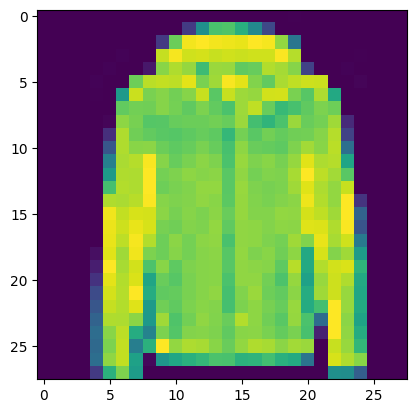

In [6]:
plt.imshow(X_train_full[5000], )

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_valid.shape, X_train.shape, y_valid.shape, y_train.shape

((5000, 28, 28), (55000, 28, 28), (5000,), (55000,))

In [8]:
["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"][y_train[5000]]

'Bag'

In [9]:
X_train_full.shape, X_train_full.dtype 

((60000, 28, 28), dtype('uint8'))

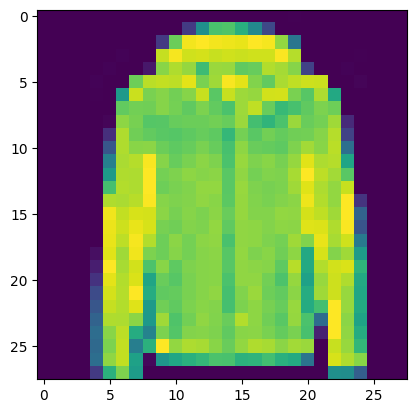

In [10]:
plt.imshow(X_train_full[5000])

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
y_train[0]

4

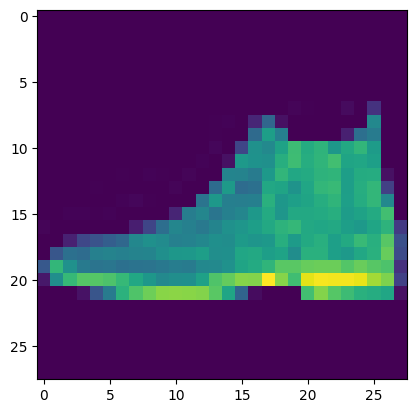

In [14]:
plt.imshow(X_test[0],)

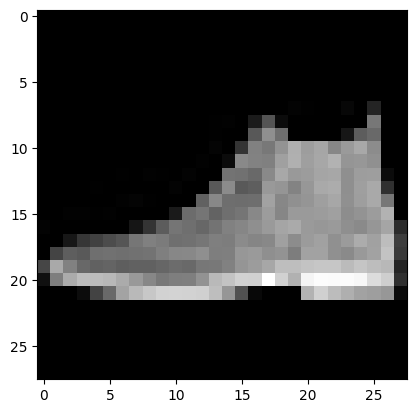

In [15]:
plt.imshow(X_test[0], cmap='gray')

In [16]:
# X_test[0]

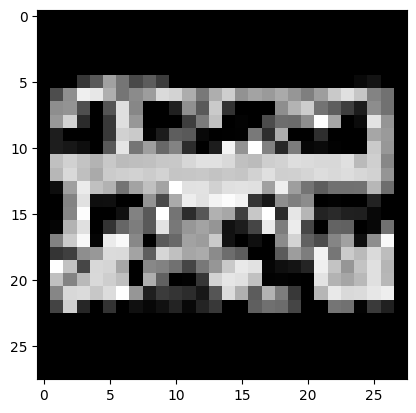

In [17]:
plt.imshow(X_train[5000], cmap="gray")

In [18]:
y_train[5000]

8

In [19]:
# model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
# model.add(keras.layers.Dense(300, activation="relu"))
# model.add(keras.layers.Dense(100, activation="relu"))
# model.add(keras.layers.Dense(10, activation="softmax"))

In [20]:
model = keras.models.Sequential([
                                keras.layers.Flatten(input_shape=[28, 28]),
                                keras.layers.Dense(300, activation="relu"),
                                keras.layers.Dense(100, activation="relu"),
                                keras.layers.Dense(10, activation="softmax")
                                ])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
keras.utils.plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [23]:
model.layers

In [24]:
hidden1 = model.layers[1]

In [25]:
hidden1

In [26]:
hidden1.name

'dense'

In [27]:
model.get_layer('dense')

In [28]:
model.get_layer('dense') is hidden1

True

In [29]:
model.layers[2].name

'dense_1'

In [30]:
model.layers[3].name

'dense_2'

In [31]:
for i in range(4):
    print(model.layers[i].name)

flatten
dense
dense_1
dense_2


In [32]:
weights, biases = hidden1.get_weights()

In [33]:
weights

array([[ 0.04446021,  0.01590225, -0.01993352, ..., -0.06530727,
        -0.07098474,  0.00940721],
       [-0.02717709,  0.02405432,  0.02717782, ...,  0.01884504,
        -0.03295193, -0.02132078],
       [ 0.00656088,  0.02064659,  0.0022094 , ...,  0.07073134,
         0.07074399,  0.05701636],
       ...,
       [ 0.04995093, -0.0187012 , -0.01828218, ..., -0.03466821,
         0.04385989,  0.01528425],
       [ 0.05963166,  0.0359594 , -0.07144969, ...,  0.01251344,
         0.06625938,  0.05005883],
       [-0.06749454,  0.02884853,  0.0521712 , ..., -0.0457157 ,
         0.03798338, -0.06783551]], dtype=float32)

In [34]:
weights.shape

(784, 300)

In [35]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [36]:
biases.shape

(300,)

In [37]:
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"])

In [38]:
start = time.time()

In [39]:
history = model.fit(X_train, y_train, epochs=30,
                        validation_data=(X_valid, y_valid))

Epoch 1/30


1719/1719 [==============================] - 6s 3ms/step - loss: 0.7215 - accuracy: 0.7647 - val_loss: 0.5056 - val_accuracy: 0.8294
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4888 - accuracy: 0.8290 - val_loss: 0.4426 - val_accuracy: 0.8510
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4456 - accuracy: 0.8444 - val_loss: 0.4355 - val_accuracy: 0.8492
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4168 - accuracy: 0.8553 - val_loss: 0.3989 - val_accuracy: 0.8568
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3973 - accuracy: 0.8611 - val_loss: 0.3935 - val_accuracy: 0.8584
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3798 - accuracy: 0.8659 - val_loss: 0.3804 - val_accuracy: 0.8686
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3649 - accuracy: 0.8707 - val_loss: 0.3672 - val_accurac

In [40]:
stop = time.time()

In [41]:
time_taken = stop - start

In [42]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [43]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [44]:
history

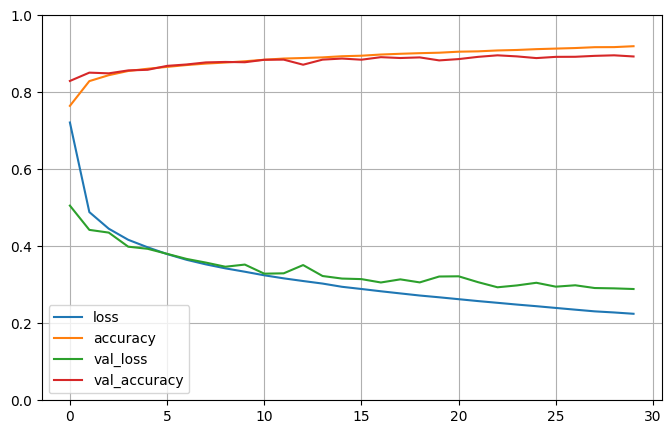

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [46]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 74.3257 - accuracy: 0.8291


[74.32567596435547, 0.8291000127792358]

In [47]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 92ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [48]:
model.predict(X_test[:1])

1/1 [==============================] - 0s 28ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [49]:
model(X_test[:1], training=False)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)>

In [50]:
model(X_test[:1], training=False).numpy()

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [51]:
model.predict(X_new)

1/1 [==============================] - 0s 25ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [52]:
y_pred_prob = model.predict(X_new)
y_pred = np.argmax(y_pred_prob, axis = 1)

1/1 [==============================] - 0s 27ms/step


In [53]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

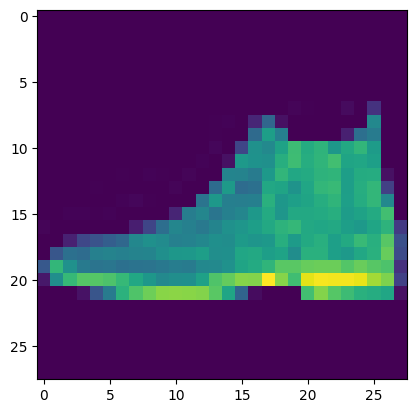

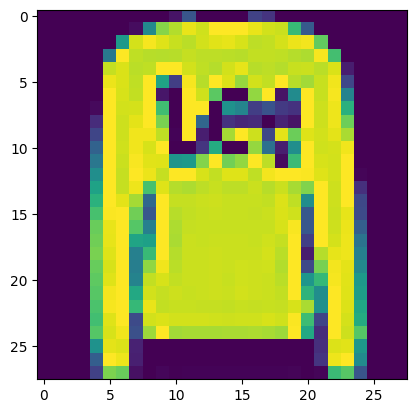

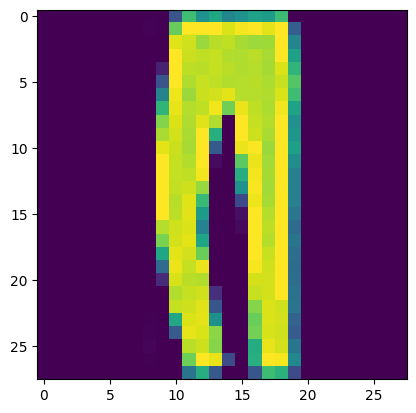

In [54]:
for i in range(3):
    plt.imshow(X_new[i])
    plt.show()

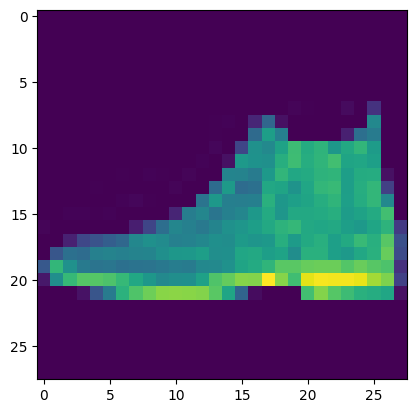

In [55]:
plt.imshow(X_new[0])
plt.show()

In [56]:
len(X_new)

3

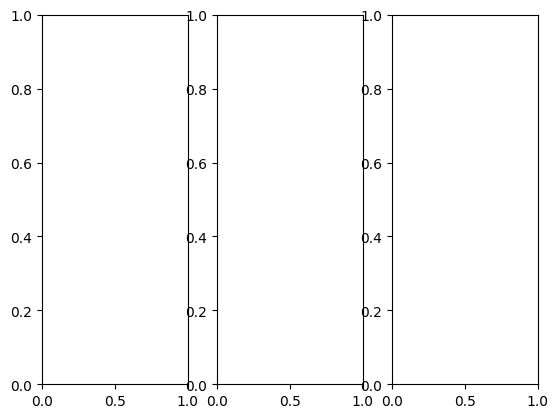

In [57]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

In [58]:
ax1.imshow(X_new[0])
ax2.imshow(X_new[1])
ax3.imshow(X_new[2])
# plt.show()

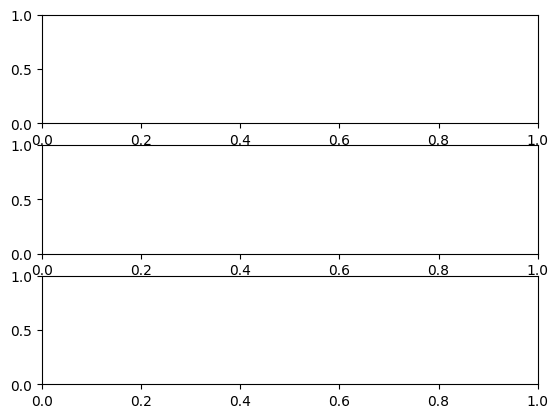

In [59]:
fig, axs = plt.subplots(3)
# for i in range(len(X_new)):
#     plt.imshow(X_new[i])
#     plt.show()
# fig.imshow()

# Saving and Restoring a Model

In [60]:
model.save("2_my_keras_model.keras")

In [61]:
loaded_model = keras.models.load_model("2_my_keras_model.keras")

In [62]:
print(time_taken) # 239.87854671478271 - charging GPU
# 146.83839917182922 - charging CPU
# CPU Discharging - 191.93282103538513


151.74207663536072


In [63]:
tf.__version__

'2.15.0'

In [64]:
keras.__version__

'2.15.0'